In [1]:
import numpy as np
import math
# import random
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
# from gc_utils import dictionary_to_vector, vector_to_dictionary, gradients_to_vector

# from deep_nn_utilities import *

In [2]:
# GRADED FUNCTION: gradient_check_n
# will need dimensions fixed
def dictionary_to_vector(parameters):
    """
    Roll all our parameters dictionary into a single vector satisfying our specific required shape.
    """
    keys = []
    count = 0
    for key in ["W1", "b1", "W2", "b2", "W3", "b3", "W4", "b4"]:
        
        # flatten parameter
        new_vector = np.reshape(parameters[key], (-1,1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta, keys

def vector_to_dictionary(theta):
    """
    Unroll all our parameters dictionary from a single vector satisfying our specific required shape.
    """
    parameters = {}
    parameters["W1"] = theta[:12].reshape((3,4))      # 4, 3, 8, 5, 3
    parameters["b1"] = theta[12:15].reshape((3,1))
    parameters["W2"] = theta[15:39].reshape((8,3))
    parameters["b2"] = theta[39:47].reshape((8,1))
    parameters["W3"] = theta[47:87].reshape((5,8))
    parameters["b3"] = theta[87:92].reshape((5,1))
    parameters["W4"] = theta[92:107].reshape((3,5))
    parameters["b4"] = theta[107:110].reshape((3,1))
    return parameters

def gradients_to_vector(gradients):
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3", "dW4", "db4"]:
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta

def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """

    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                # Step 2
        AL_plus, _ = L_model_forward(X, vector_to_dictionary(thetaplus))
        J_plus[i] = compute_cost(AL_plus, Y)
#         J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))                                   # Step 3
        ### END CODE HERE ###
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        thetaminus = np.copy(parameters_values)                                     # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                               # Step 2   
        AL_minus, _ = L_model_forward(X, vector_to_dictionary(thetaminus))
        J_minus[i] = compute_cost(AL_minus, Y)
#         J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))                                   # Step 3
        ### END CODE HERE ###
        
        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
        ### END CODE HERE ###
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                                            # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                                         # Step 2'
    difference = numerator / denominator                                           # Step 3'
    ### END CODE HERE ###
#     print('grad')
#     print(grad)
#     print('grad approx')
#     print(gradapprox)
#     print('numerator', numerator)
#     print('denominator', denominator)
#     print(grad-gradapprox)
    if difference > 1.2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [3]:
def initialize_parameters(layer_dims):
# layers_dims: array containing dimensions of each layer ex initialize_parameters([5, 4, 3])

    np.random.seed(12)
    parameters = {}
    L = len(layer_dims) # number of layers in nn
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
#     print([(k, parameters[k].shape) for k, v in parameters.items()])
#     for k, v in parameters.items():
#         print(k, v.shape)
    return parameters

def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
        
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0, Z)

    assert(A.shape == Z.shape)
    cache = Z
    return A, cache

def softmax(Z):
    t = np.exp(Z)
    A = t / np.sum(t, axis=0)
    cache = Z
    
    return A, cache
    

def neuron_activation(A_prev, W, b, activation):
    if activation == 'sigmoid':
        Z, linear_cache = linear_forward(A_prev, W, b)
        # linear cache: A, W, b
        A, activation_cache = sigmoid(Z)
        # activation cache: Z
        
    elif activation == 'relu':
#         print('relu')
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    elif activation == 'softmax':
#         print('softmax')
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 # // is floor division
    
    for l in range(1, L):
        
        A_prev = A
        
        A, cache = neuron_activation(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache)

    AL, cache = neuron_activation(A, parameters['W' + str(L)], parameters['b' + str(L)], 'softmax')
    caches.append(cache)
#     print('\n', AL)
#     assert(AL.shape == (1, X.shape[1]))
    assert(AL.shape == (3, X.shape[1])) # should be  (classes x m)

    return AL, caches

def compute_cost(AL, Y):
    m = Y.shape[1]
#     cost = (-1/m) * np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    
#     cost = np.squeeze(cost)
#     assert(cost.shape == ())
#     cost = (-1/m) * np.sum(Y * np.log(AL))
    cost = (-1/m) * np.sum(Y * np.log(AL))
    
    return cost
    
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
#     print('dZ.shape', dZ.shape, 'A_prev.shape', A_prev.shape, 'W.shape', W.shape)
    dW = (1/m) * np.dot(dZ, A_prev.T)
#     dW = (1/m) * np.dot(A_prev, dZ.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
#     dA_prev = np.dot(W, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1-s) # dLoss/dA * a(1-a) -- same as dLoss/dA * g_prime(Z)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def softmax_backward(dA, cache):
    Z = cache
    dZ = dA
    
    assert (dZ.shape == Z.shape)

    return dZ

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    # check here for reverse grad shape bug
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
       
    elif activation == 'softmax':
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
#     Y = Y.reshape(AL.shape)
    
#     dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) #derivative of cost function
    dAL = AL - Y # this is dZ for softmax, not dA * g_prime(z)
    current_cache = caches[L-1]

    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "softmax")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+2)], current_cache, "relu")
        grads["dA" + str(l+1)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp
            
    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2      
    for l in range(1, L+1):
        parameters['W'+str(l)] = parameters['W'+str(l)] - learning_rate * grads['dW'+str(l)]
        parameters['b'+str(l)] = parameters['b'+str(l)] - learning_rate * grads['db'+str(l)]
#     print('update parameters')
#     for k, v in parameters.items():
#         print(k, v)
    return parameters

def predict(X, y, parameters):
    print('X', X.shape, 'Y.shape', y.shape)
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((y.shape[0], m))
    acc = []
    probas, caches = L_model_forward(X, parameters)
    print('probas\n', probas.shape)
    # max for each example
    # search for index == max
    # assign 1 to that class and 0 to the others
    for i in range(0, probas.shape[1]):
#         print(probas[:, i])
        index = np.where(probas[:, i] == np.max(probas[:, i]))
        probas[index, i] = 1
        zeros = np.where(probas[:, i] != 1)
        probas[zeros, i] = 0
        if np.where(probas[:,i] == 1) == np.where(y[:,i] ==1):
            acc.append(True)
            
    print(type(probas))
    print("Accuracy: " + str(sum(acc)/m))
#     print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [4]:
def L_layer_model(X, Y, layer_dims, learning_rate = .0075, num_iterations = 10, print_cost = False):
    np.random.seed(3)
    costs = []
    
    parameters = initialize_parameters(layer_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 training example
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
#             difference = gradient_check_n(parameters, grads, X, Y)
#             print(difference)
        if print_cost and i % 10000 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [23]:
wine = datasets.load_wine(True)
wine[0].shape[0]
X = wine[0].T
X = preprocessing.scale(X)

Y_cat = wine[1]
Y = []
for i in Y_cat:
    if i==0:
        Y.append([1,0,0])
    elif i == 1:
        Y.append([0,1,0])
    elif i == 2:
        Y.append([0,0,1])
Y = np.array(Y).T


In [24]:
# iris = datasets.load_iris(True)
# iris[0].shape[0]
# X = iris[0].T
# X = preprocessing.scale(X)

# Y_cat = iris[1]
# Y = []
# for i in Y_cat:
#     if i==0:
#         Y.append([1,0,0])
#     elif i == 1:
#         Y.append([0,1,0])
#     elif i == 2:
#         Y.append([0,0,1])
# Y = np.array(Y).T
# split into training/test
# Y = Y[:, :5]
# print('X.shape', X.shape)
# print('Y.shape', Y.shape)
# iris
#normalize data
# l2 regularization
# gradient checking
# X.mean(axis=0)
# X.std(axis=0)

In [25]:
# N = 3000 # number of points per class
# D = 2 # dimensionality
# K = 3 # number of classes
# X = np.zeros((N*K,D)) # data matrix (each row = single example)
# y = np.zeros(N*K, dtype='uint8') # class labels
# for j in range(K):
#   ix = range(N*j,N*(j+1))
#   r = np.linspace(0.0,1,N) # radius
#   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
#   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#   y[ix] = j
# # lets visualize the data:
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.show()
# X = X.T
# Y = []
# for i in y:
#     if i==0:
#         Y.append([1,0,0])
#     elif i == 1:
#         Y.append([0,1,0])
#     elif i == 2:
#         Y.append([0,0,1])
# Y = np.array(Y).T
# print(Y.shape, X.shape)

In [26]:
np.random.seed(101)
split = np.random.rand(X.shape[1])

In [34]:

train = split < .7
test = split >= .7
X_train = X[:, train]
Y_train = Y[:, train]
X_test = X[:, test]
Y_test = Y[:, test]

# train = split < .6
# cv = (.6 <= split) & (split < .8)
# test = .8 <= split

# X_train = X[:, train]
# X_cv = X[:, cv]
# X_test = X[:, test]

# Y_train = Y[:, train]
# Y_cv = Y[:, cv]
# Y_test = Y[:, test]

print(X_train.shape, Y_train.shape)
# print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)



(13, 124) (3, 124)
(13, 54) (3, 54)
[-0.28151961 -0.31819362 -0.31649466 -0.28090448 -0.04246487 -0.3163482
 -0.31628962 -0.32279251 -0.3178714  -0.30829281 -0.32068347 -0.31318463
  3.45503988]


In [28]:
# create dummy data in three distinct categories of magnitude, X: [3,30]
inputs = X.shape[0] # inputs = 4 for iris
m = X.shape[1]
# layer_dims = [inputs, 3, 4, 5, 3]
layer_dims = [inputs, 3, 8, 5, 3] # best architecture so far
# layer_dims = [inputs, 3, 4, 8, 3]

Cost after iteration 0: 1.121700
Cost after iteration 10000: 1.041385
Cost after iteration 20000: 0.753529
Cost after iteration 30000: 0.613838
Cost after iteration 40000: 0.593196
Cost after iteration 50000: 0.580898
Cost after iteration 60000: 0.567976
Cost after iteration 70000: 0.553285
Cost after iteration 80000: 0.536623
Cost after iteration 90000: 0.519056
Cost after iteration 100000: 0.503424
Cost after iteration 110000: 0.492178
Cost after iteration 120000: 0.485194
Cost after iteration 130000: 0.481065
Cost after iteration 140000: 0.478561
Cost after iteration 150000: 0.476922
Cost after iteration 160000: 0.475720
Cost after iteration 170000: 0.474735
Cost after iteration 180000: 0.473853
Cost after iteration 190000: 0.473011
Cost after iteration 200000: 0.472175
Cost after iteration 210000: 0.471323
Cost after iteration 220000: 0.470439
Cost after iteration 230000: 0.469503
Cost after iteration 240000: 0.468488
Cost after iteration 250000: 0.467364
Cost after iteration 26000

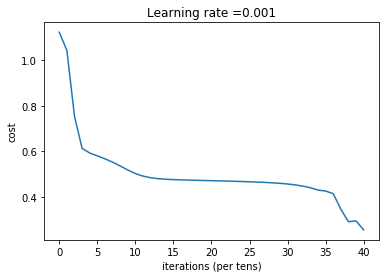

In [38]:
parameters = L_layer_model(X_train, Y_train, layer_dims, .001, 400001, True)
# iris .001 ?
# spiral .033
# wine .001 700001

In [39]:
# p = predict(X_cv, Y_cv, parameters)
# print('p.shape', p.shape)

In [40]:
p = predict(X_test, Y_test, parameters)
print('p.shape', p.shape)

X (13, 54) Y.shape (3, 54)
probas
 (3, 54)
<class 'numpy.ndarray'>
Accuracy: 0.8888888888888888
p.shape (3, 54)


In [41]:
p_train = predict(X_train, Y_train, parameters)
print('p.shape', p.shape)

X (13, 124) Y.shape (3, 124)
probas
 (3, 124)
<class 'numpy.ndarray'>
Accuracy: 0.8790322580645161
p.shape (3, 54)
